# Подготовка датасета для загрузки в ML модели

In [3]:
import pandas as pd
df = pd.read_excel(".../datasets/final_dataset.xlsx")

In [4]:
# Определим соотношение для разделения обучающего и тестировочного наборов данных (возьмём 95/5)
train_ratio = 0.95
train_data = df[:int(train_ratio * len(df))]
test_data = df[int(train_ratio * len(df)):]

In [5]:
train_data.head()

,W_over_L_rank_difference_normalized,W_played_here_before,L_played_here_before,Temperature,Windspeed_10m,Relativehumidity_2m,Surface_pressure,Precipitation,Сloudcover,Shortwave_radiation,...,Surface_Clay,Surface_Grass,Surface_Hard,player_1,player_2,player_1_win,player_1_h2h_winning_ratio,Month,Day,Year
0,0.200671,False,False,21.433333,9.650000,85.000000,1017.633333,0.0,72.000000,0.000000,...,0,0,1,967,118,0,0.5,1,3,2000
1,1.214444,False,False,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,1,79,970,0,0.5,1,3,2000
2,-2.212973,False,False,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,1,79,242,1,0.5,1,3,2000
3,1.006805,False,False,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,1,970,1142,1,0.5,1,3,2000
4,2.156733,False,False,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,1,242,438,1,0.5,1,3,2000


In [6]:
test_data.head()

,W_over_L_rank_difference_normalized,W_played_here_before,L_played_here_before,Temperature,Windspeed_10m,Relativehumidity_2m,Surface_pressure,Precipitation,Сloudcover,Shortwave_radiation,...,Surface_Clay,Surface_Grass,Surface_Hard,player_1,player_2,player_1_win,player_1_h2h_winning_ratio,Month,Day,Year
53933,3.012262,True,True,19.2,6.416667,31.5,1000.516667,0.0,0.0,67.666667,...,0,0,1,491,463,1,1.0,10,11,2021
53934,1.684339,True,True,19.2,6.416667,31.5,1000.516667,0.0,0.0,67.666667,...,0,0,1,303,831,0,0.0,10,11,2021
53935,1.139434,True,True,19.2,6.416667,31.5,1000.516667,0.0,0.0,67.666667,...,0,0,1,814,91,1,0.5,10,11,2021
53936,0.382992,True,True,19.2,6.416667,31.5,1000.516667,0.0,0.0,67.666667,...,0,0,1,667,3,1,1.0,10,11,2021
53937,-0.336472,True,True,19.2,6.416667,31.5,1000.516667,0.0,0.0,67.666667,...,0,0,1,1078,769,0,1.0,10,11,2021


In [7]:
# Сохраненим новые тестовые и обучающие наборы данных
train_data.to_csv("train_set.csv", index=False)
test_data.to_csv("test_set.csv", index=False)

In [8]:
# X,y для оригинального df. y: player_1_win, поэтому удаляем из оригинала и сохраняем в y
y = train_data['player_1_win']
X = train_data.drop('player_1_win', axis = 1)

In [9]:
# X, y для тестировочного набора
y_test = test_data['player_1_win']
X_test = test_data.drop('player_1_win', axis = 1)

In [10]:
# Преобразование булевых значений в 0 и 1
X[["W_played_here_before",	"L_played_here_before"]] = X[["W_played_here_before",	"L_played_here_before"]].astype(int)

In [11]:
X

,W_over_L_rank_difference_normalized,W_played_here_before,L_played_here_before,Temperature,Windspeed_10m,Relativehumidity_2m,Surface_pressure,Precipitation,Сloudcover,Shortwave_radiation,...,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,player_1,player_2,player_1_h2h_winning_ratio,Month,Day,Year
0,0.200671,0,0,21.433333,9.650000,85.000000,1017.633333,0.0,72.000000,0.000000,...,0,0,0,1,967,118,0.5,1,3,2000
1,1.214444,0,0,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,0,1,79,970,0.5,1,3,2000
2,-2.212973,0,0,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,0,1,79,242,0.5,1,3,2000
3,1.006805,0,0,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,0,1,970,1142,0.5,1,3,2000
4,2.156733,0,0,24.016667,17.466667,69.666667,1010.133333,0.0,31.166667,73.166667,...,0,0,0,1,242,438,0.5,1,3,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53928,0.551177,1,1,19.866667,10.933333,17.833333,1010.333333,0.0,0.000000,67.833333,...,0,0,0,1,138,728,0.0,10,10,2021
53929,1.769781,0,1,19.866667,10.933333,17.833333,1010.333333,0.0,0.000000,67.833333,...,0,0,0,1,205,888,0.5,10,10,2021
53930,-0.538997,1,1,19.866667,10.933333,17.833333,1010.333333,0.0,0.000000,67.833333,...,0,0,0,1,80,1095,0.5,10,10,2021
53931,-0.538997,1,1,19.866667,10.933333,17.833333,1010.333333,0.0,0.000000,67.833333,...,0,0,0,1,80,1095,0.5,10,10,2021


In [12]:
## Сделаем тоже самое для X
X_test[["W_played_here_before",	"L_played_here_before"]] = X_test[["W_played_here_before",	"L_played_here_before"]].astype(int)

In [13]:
X = X.drop("player_1_h2h_winning_ratio", axis = 1)
X_test = X_test.drop("player_1_h2h_winning_ratio", axis = 1)

In [14]:
y

0        0
1        0
2        1
3        1
4        1
        ..
53928    0
53929    0
53930    1
53931    1
53932    0
Name: player_1_win, Length: 53933, dtype: int64

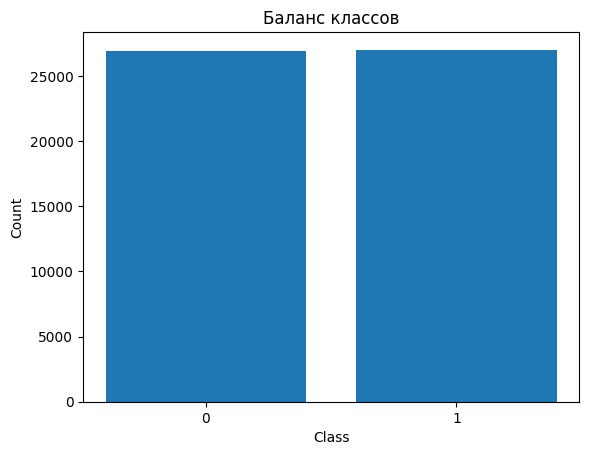

In [15]:
import matplotlib.pyplot as plt

# Подсчитаем количество появлений каждого класса
counts = y.value_counts()

# Создадим столбчатую диаграмму для баланса классов
plt.bar(counts.index, counts.values)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Баланс классов')
plt.show()

In [16]:
print(counts)

player_1_win
1    27025
0    26908
Name: count, dtype: int64


Баланс классов почти одинаковые, это хорошо.

# Моделирование

## Базовая модель из Sklearn

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Создадим экземпляр объекта масштабирования
scaler = MinMaxScaler()

# Нормализуем обучающий набор
X_train_normalized = scaler.fit_transform(X)

# Нормализуем тестовый набор
X_test_normalized = scaler.transform(X_test)

# Создадим экземпляр классификатора логистической регрессии
clf = LogisticRegression(random_state=42)

# Используйем перекрестную проверку для оценки эффективности классификатора
scores = cross_val_score(clf, X_train_normalized, y, cv=5)

# Вычислим среднюю точность и выведем её
mean_accuracy = scores.mean()
print("Mean accuracy: {:.2f}%".format(mean_accuracy*100))

# Обучим классификатор на нормализованном тренировочном наборе
clf.fit(X_train_normalized, y)

# Сделаем прогнозы на основе нормализованного тестового набора
y_pred = clf.predict(X_test_normalized)

# Рассчитаем точность на тестовом наборе и выведем ее
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(accuracy*100))

Mean accuracy: 49.42%
Test accuracy: 51.14%


## Планировщик Lr с базовой архитектурой

In [79]:
import tensorflow as tf
tf.random.set_seed(42)

# Определим архитектуру нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_normalized.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируем модель с потерей binary_crossentropy и оптимизатором Adam
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Обратный вызов lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# Натренируем модель на тренировочном наборе
history = model.fit(X_train_normalized, y, epochs=50, batch_size =32, validation_data=(X_test_normalized, y_test),  callbacks = [lr_callback])

# Оценим модель на тестовом наборе
loss, accuracy = model.evaluate(X_test_normalized, y_test)

# Выведем точность тестового набора
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/50


B:\Python\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.4990 - loss: 0.6949 - val_accuracy: 0.5083 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.5032 - loss: 0.6934 - val_accuracy: 0.5125 - val_loss: 0.6918 - learning_rate: 0.0011
Epoch 3/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.5027 - loss: 0.6933 - val_accuracy: 0.5164 - val_loss: 0.6916 - learning_rate: 0.0013
Epoch 4/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.5054 - loss: 0.6929 - val_accuracy: 0.5195 - val_loss: 0.6905 - learning_rate: 0.0014
Epoch 5/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.5155 - loss: 0.6925 - val_accuracy: 0.5122 - val_loss: 0.6910 - learning_rate: 0.0016
Epoch 6/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.5163 - loss: 0.6918 - val_accuracy: 0.5192 - val_loss: 0.6924 - learning_rate: 0.0018
Epoch 7/50
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.5231 

Text(0, 0.5, 'loss')

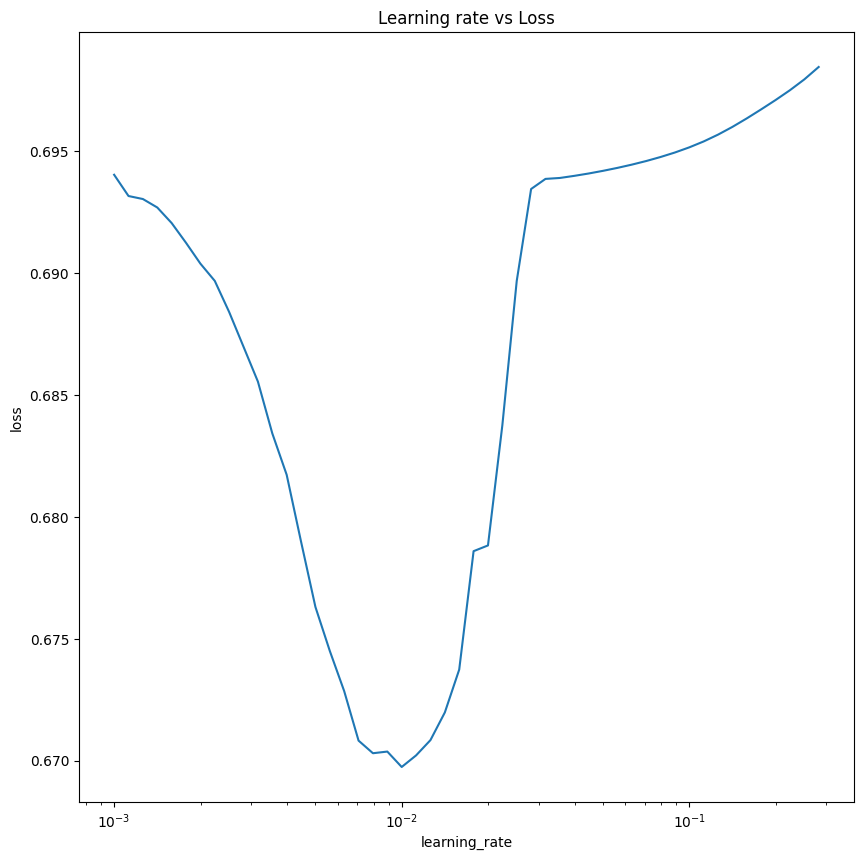

In [80]:
lr = 1e-3 * (10**(tf.range(50)/20))

# Построим кривую потерь в зависимости от lr
plt.figure(figsize = (10,10))
plt.semilogx(lr, history.history["loss"])
plt.title("Learning rate vs Loss")
plt.xlabel("learning_rate")
plt.ylabel("loss")

## Планировщик Lr с уменьшением lr на плато в сложной модели

In [81]:
import tensorflow as tf

tf.random.set_seed(42)

# Определим архитектуру нейронной сети
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируем модель с потерей binary_crossentropy и оптимизатором Adam
model_complex.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Обратный вызов lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Натренируем модель на тренировочном наборе
history_complex = model_complex.fit(X_train_normalized, y, epochs=100, batch_size =128, validation_data=(X_test_normalized, y_test),  callbacks = [lr_callback, reduce_lr_on_plateau])

# Оценим модель на тестовом наборе
loss, accuracy = model_complex.evaluate(X_test_normalized, y_test)

# Выведем точность тестового набора
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4986 - loss: 0.6962 - val_accuracy: 0.4886 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4993 - loss: 0.6935 - val_accuracy: 0.4998 - val_loss: 0.6932 - learning_rate: 0.0011
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4958 - loss: 0.6933 - val_accuracy: 0.4871 - val_loss: 0.6949 - learning_rate: 0.0013
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5027 - loss: 0.6934 - val_accuracy: 0.4871 - val_loss: 0.6935 - learning_rate: 0.0014
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4996 - loss: 0.6933 - val_accuracy: 0.4871 - val_loss: 0.6945 - learning_rate: 0.0016
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5045 - loss: 0.6932 - val_accuracy: 0.4871 - val_loss: 0.6996 - learning_rate: 0.0018
Epoch 7/100
413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5023 - loss: 0.

Text(0, 0.5, 'loss')

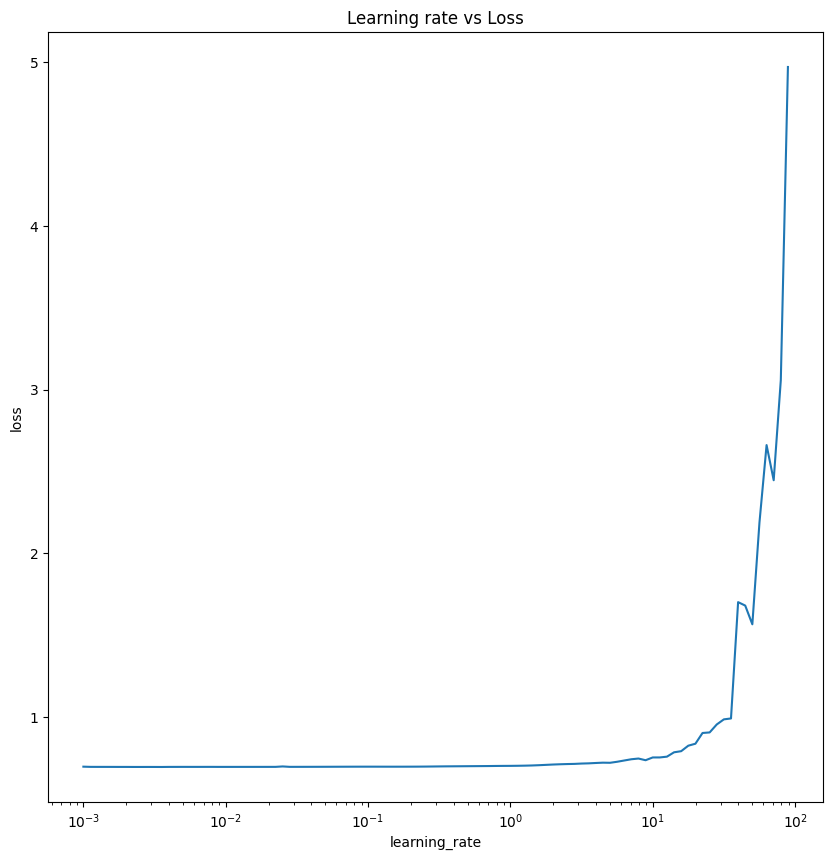

In [82]:
lr = 1e-3 * (10**(tf.range(100)/20))

# Построим кривую потерь в зависимости от lr
plt.figure(figsize = (10,10))
plt.semilogx(lr, history_complex.history["loss"])
plt.title("Learning rate vs Loss")
plt.xlabel("learning_rate")
plt.ylabel("loss")

Видим, что lr по умолчанию работает нормально.

## Теперь batch size только увеличивается

In [83]:
import tensorflow as tf

tf.random.set_seed(42)

# Определим архитектуру нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируем модель с потерей binary_crossentropy и оптимизатором Adam
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Натренируем модель на тренировочном наборе
history = model.fit(X_train_normalized, y, epochs=200, batch_size=128, validation_data=(X_test_normalized, y_test))

# Оценим модель на тестовом наборе
loss, accuracy = model.evaluate(X_test_normalized, y_test)

# Выведем точность тестового набора
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4974 - loss: 0.6963 - val_accuracy: 0.4864 - val_loss: 0.6942
Epoch 2/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4971 - loss: 0.6937 - val_accuracy: 0.5033 - val_loss: 0.6934
Epoch 3/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5008 - loss: 0.6933 - val_accuracy: 0.5100 - val_loss: 0.6934
Epoch 4/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.4910 - val_loss: 0.6946
Epoch 5/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5104 - loss: 0.6927 - val_accuracy: 0.5114 - val_loss: 0.6992
Epoch 6/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5102 - loss: 0.6924 - val_accuracy: 0.5188 - val_loss: 0.6954
Epoch 7/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5142 - loss: 0.6912 - val_accuracy: 0.5248 - val_loss: 0.6992
Epoch 8/200
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5173 - loss: 0.6904 - val_accu

In [84]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_36 (Dense)                   │ (None, 512)                   │      19,456 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_23 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_37 (Dense)                   │ (None, 512)                   │     262,656 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_24 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_38 (Dense)                   │ (None, 512)                   │     262,656 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_25 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_39 (Dense)                   │ (None, 1)                     │         513 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 1,635,845 (6.24 MB)

 Trainable params: 545,281 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,090,564 (4.16 MB)

## Большая модель

In [85]:
import tensorflow as tf

tf.random.set_seed(42)

# Определим архитектуру нейронной сети
model_large = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируем модель с потерей binary_crossentropy и оптимизатором Adam
model_large.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Натренируем модель на тренировочном наборе
history = model_large.fit(X_train_normalized, y, epochs=500, batch_size=128, validation_data=(X_test_normalized, y_test))

# Оценим модель на тестовом наборе
loss, accuracy = model_large.evaluate(X_test_normalized, y_test)

# Выведем точность тестового набора
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4966 - loss: 0.6963 - val_accuracy: 0.4871 - val_loss: 0.6938
Epoch 2/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4974 - loss: 0.6934 - val_accuracy: 0.4871 - val_loss: 0.6937
Epoch 3/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4995 - loss: 0.6933 - val_accuracy: 0.4875 - val_loss: 0.6933
Epoch 4/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4871 - val_loss: 0.6935
Epoch 5/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.4861 - val_loss: 0.6933
Epoch 6/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4868 - val_loss: 0.6934
Epoch 7/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6935
Epoch 8/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5010 - loss: 0.6932 - 

## Архитектура модели и её сводка

In [87]:
model_large.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_40 (Dense)                   │ (None, 1024)                  │      38,912 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_26 (Dropout)               │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_41 (Dense)                   │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_27 (Dropout)               │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_42 (Dense)                   │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_28 (Dropout)               │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_43 (Dense)                   │ (None, 512)                   │     524,800 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_29 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_44 (Dense)                   │ (None, 1)                     │         513 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 7,990,277 (30.48 MB)

 Trainable params: 2,663,425 (10.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,326,852 (20.32 MB)

## Точность модели

In [90]:
model_large.evaluate(X_test_normalized, y_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.4646


[0.5212044715881348, 0.8027474284172058]

## Тестирование других различных метрик

In [91]:
from helper_functions import calculate_results
from helper_functions import binarize_predictions

In [92]:
y_preds = model_large.predict(X_test_normalized)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [93]:
y_preds = binarize_predictions(y_preds)

In [94]:
results = calculate_results(y_test, y_preds)

In [95]:
results

{'accuracy': 80.27474462839028,
 'precision': 0.802898790389997,
 'recall': 0.8027474462839028,
 'f1': 0.80277491414732}

## Результаты

In [96]:
df_results = pd.DataFrame.from_dict(results, orient="index", columns=["Score"])
df_results

,Score
accuracy,80.274745
precision,0.802899
recall,0.802747
f1,0.802775


## Матрица confusion

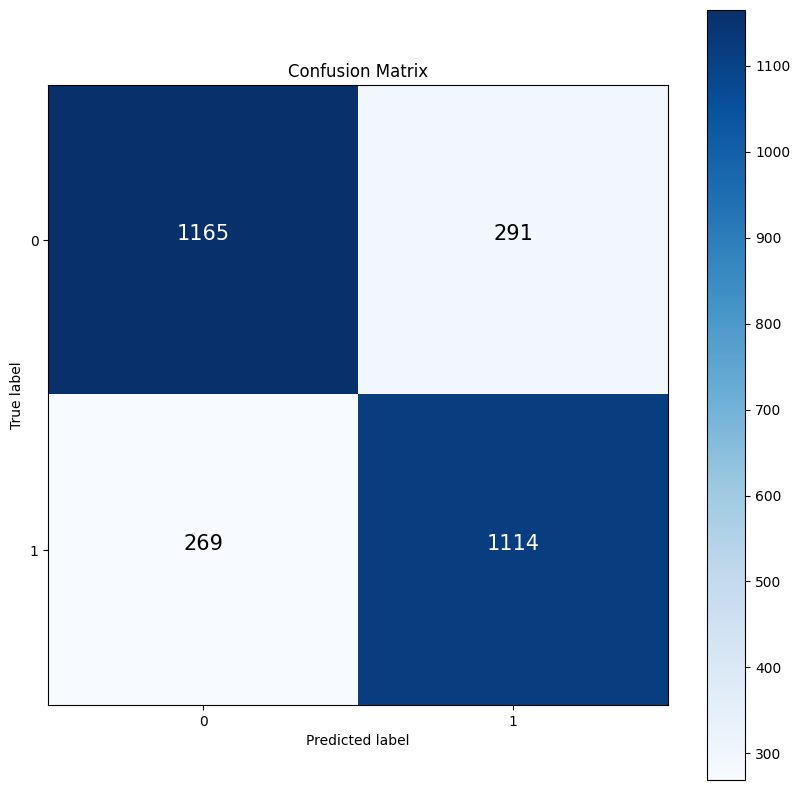

In [97]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_test, y_preds, savefig = True)

## Кривая потерь

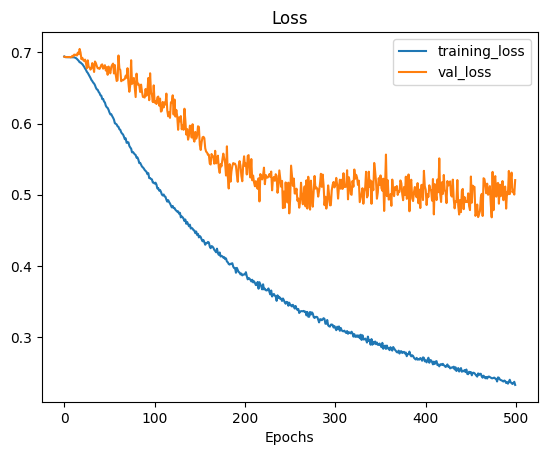

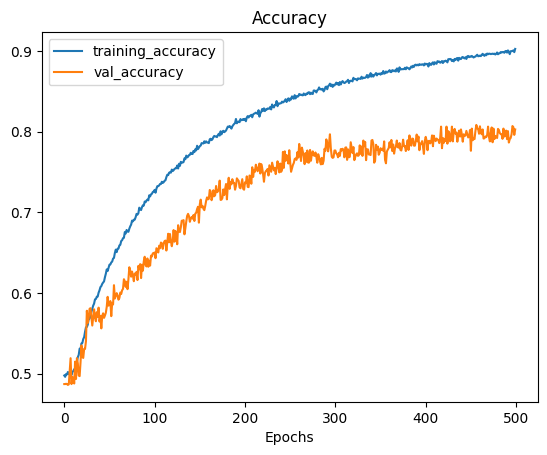

In [98]:
from helper_functions import plot_loss_curves
plot_loss_curves(history) 

## Использование стандартного скейлера

In [15]:
from sklearn.preprocessing import StandardScaler

# Создадим экземпляр объекта масштабирования
scaler = StandardScaler()

# Нормализуем обучающий набор
X_train_normalized = scaler.fit_transform(X)

# Нормализуем тестовый набор
X_test_normalized = scaler.transform(X_test)

import tensorflow as tf

tf.random.set_seed(42)

# Определим архитектуру нейронной сети
model_large = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируем модель с потерей binary_crossentropy и оптимизатором Adam
model_large.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Натренируем модель на тренировочном наборе
history = model_large.fit(X_train_normalized, y, epochs=500, batch_size=128, validation_data=(X_test_normalized, y_test))

# Оценим модель на тестовом наборе
loss, accuracy = model_large.evaluate(X_test_normalized, y_test)

# Выведем точность тестового набора
print("Test accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/500


B:\Python\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4980 - loss: 0.6985 - val_accuracy: 0.4977 - val_loss: 0.6942
Epoch 2/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5159 - loss: 0.6906 - val_accuracy: 0.4967 - val_loss: 0.6933
Epoch 3/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5442 - loss: 0.6817 - val_accuracy: 0.5372 - val_loss: 0.6826
Epoch 4/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5710 - loss: 0.6640 - val_accuracy: 0.5741 - val_loss: 0.6708
Epoch 5/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6028 - loss: 0.6427 - val_accuracy: 0.6034 - val_loss: 0.6534
Epoch 6/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6355 - loss: 0.6149 - val_accuracy: 0.6094 - val_loss: 0.6534
Epoch 7/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6577 - loss: 0.5882 - val_accuracy: 0.6323 - val_loss: 0.6370
Epoch 8/500
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6780 - loss: 0.5640 - val_accuracy

## Информация о модели

In [18]:
model_large.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 1024)                  │      38,912 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 512)                   │     524,800 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 1)                     │         513 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 7,990,277 (30.48 MB)

 Trainable params: 2,663,425 (10.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,326,852 (20.32 MB)

## Оценка

In [19]:
from helper_functions import calculate_results
from helper_functions import binarize_predictions
y_preds = model_large.predict(X_test_normalized)
y_preds = binarize_predictions(y_preds)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
results = calculate_results(y_test, y_preds)
df_results = pd.DataFrame.from_dict(results, orient="index", columns=["Score"])
df_results

,Score
accuracy,83.198309
precision,0.832002
recall,0.831983
f1,0.831990


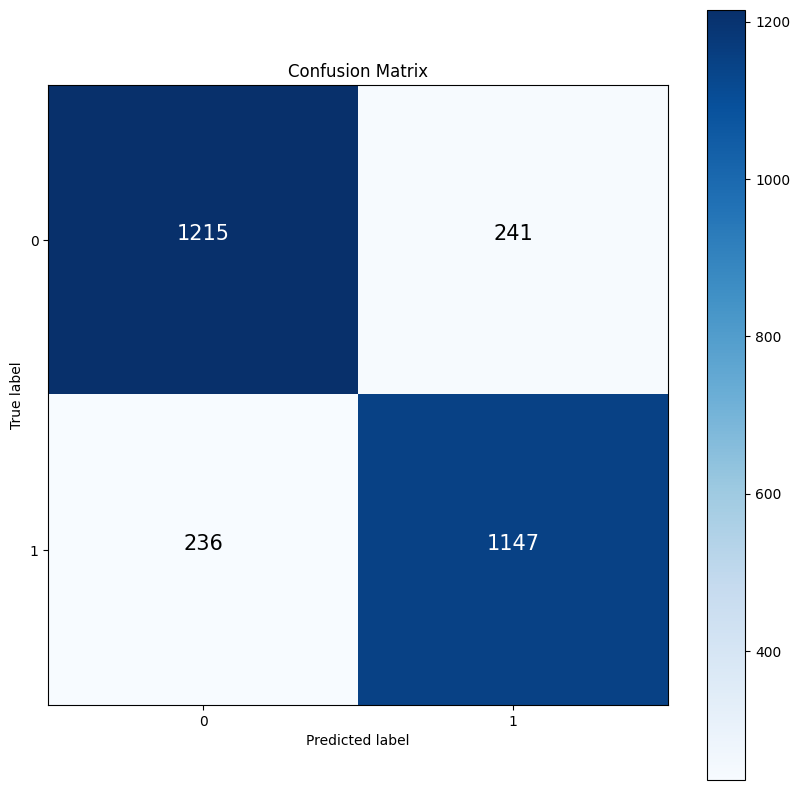

In [21]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_test, y_preds)

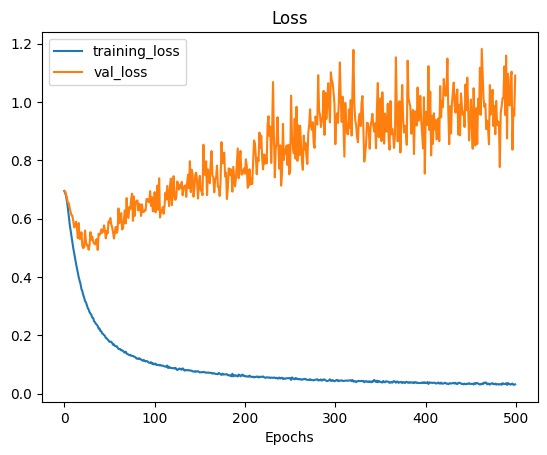

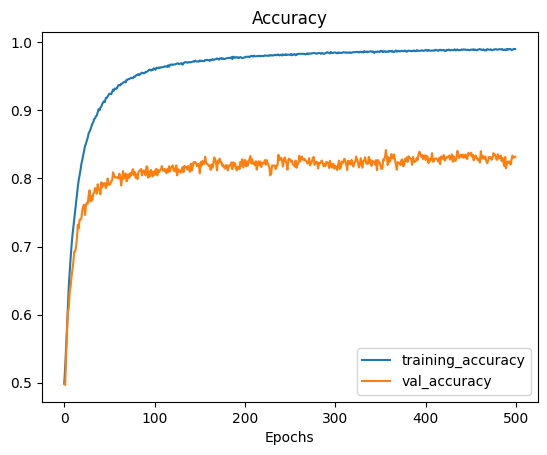

In [22]:
from helper_functions import plot_loss_curves
plot_loss_curves(history) 

Видно, что после 100 повторений использование стандартного масштабатора даёт постоянный уровень точности.

## Сохранение модели и загрузка для проверки

In [23]:
# Сохраним модель на диск
model_large.save('.../best_model/best_model.h5')

B:\Python\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [17]:
import tensorflow as tf
# Загрузим сохраненную модель
loaded_model = tf.keras.models.load_model('.../best_model/best_model.h5')

from sklearn.preprocessing import StandardScaler

# Создадим экземпляр объекта масштабирования
scaler = StandardScaler()

# Нормализуем обучающий набор
X_train_normalized = scaler.fit_transform(X)

# Нормализуем тестовый набор
X_test_normalized = scaler.transform(X_test)

# Используйем загруженную модель для предсказаний
predictions = loaded_model.predict(X_test_normalized)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
from helper_functions import calculate_results
from helper_functions import binarize_predictions
print(calculate_results(y_test, binarize_predictions(predictions)))

{'accuracy': 83.1983092638253, 'precision': 0.8320024386636063, 'recall': 0.8319830926382529, 'f1': 0.8319901843381}


## Кривая Roc

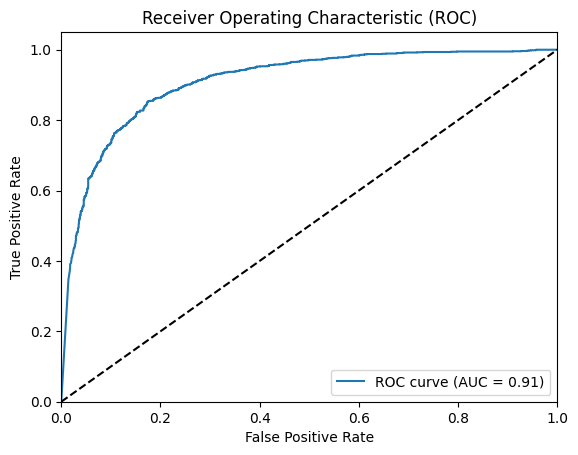

0.9095827572644275

In [19]:
from helper_functions import calculate_and_plot_auc_roc
calculate_and_plot_auc_roc(y_test, predictions)

# Обоснование использования сложной модели для объяснения того, почему нейронные сети могут быть подходящим выбором, когда другие модели недообучаются данными:

- Обучение представлению данных: Нейронные сети способны изучать сложные нелинейные зависимости между входными и выходными данными. Они могут автоматически извлекать полезные признаки из сырых данных, что особенно полезно при работе с высокоразмерными данными или когда ручная инженерия признаков затруднена.

- Гибкость: Нейронные сети можно настраивать с различными архитектурами, функциями активации и техниками регуляризации, что делает их адаптируемыми к широкому кругу задач. Эта гибкость позволяет нейронным сетям эффективно моделировать сложные паттерны в данных.

- Масштабируемость: Нейронные сети можно параллелизовать и распределять между несколькими графическими процессорами (GPU) или вычислительными узлами, что делает их пригодными для работы с большими наборами данных.

- Глубокое обучение: Глубокие нейронные сети с множеством слоев могут изучать иерархические представления данных, захватывая различные уровни абстракции. Эта способность полезна при моделировании сложных взаимосвязей или при работе с данными из разнообразных источников, такими как изображения, текст или аудио.